In [2]:
import pandas as pd
#import pmatplotlib
import os

In [ ]:
notebook_path = os.getcwd() + '/' + os.path.basename(os.getcwd())
notebook_path
cands_path = os.path.join(os.path.dirname(notebook_path), "tmp/candidates.csv")
votes_path = os.path.join(os.path.dirname(notebook_path), "tmp/votes.csv")
cands = pd.read_csv(cands_path, sep=';')
votes = pd.read_csv(votes_path, sep=';')

In [15]:
import numpy as np

Counting numbers of votes.
TotalVotes - sum of all votes which turns out to be equal to all valid ballots turned in

In [20]:
TotalVotes = np.sum(cands.iloc[0,1:])

In [21]:
import geopandas as gpd
%matplotlib inline

In [71]:
m_map = gpd.GeoDataFrame.from_file("geomap/mo.shp", encoding='utf-8')
m_map

,NAME,OKATO,OKTMO,NAME_AO,OKATO_AO,ABBREV_AO,TYPE_MO,geometry
0,Киевский,45298555,45945000,Троицкий,45298000,Троицкий,Поселение,"(POLYGON ((36.8031012 55.4408329, 36.8031903 5..."
1,Филёвский Парк,45268595,45328000,Западный,45268000,ЗАО,Муниципальный округ,"POLYGON ((37.4276499 55.7482092, 37.4284863 55..."
2,Новофёдоровское,45298567,45954000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.8035692 55.4516224, 36.8045117 55..."
3,Роговское,45298575,45956000,Троицкий,45298000,Троицкий,Поселение,"POLYGON ((36.9372397 55.2413907, 36.9372604 55..."
4,"""Мосрентген""",45297568,45953000,Новомосковский,45297000,Новомосковский,Поселение,"POLYGON ((37.4395575 55.6273129, 37.4401803 55..."
...,...,...,...,...,...,...,...,...
141,Ивановское,45263567,45306000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.7998089 55.7623198, 37.7998143 55..."
142,Косино-Ухтомский,45263573,45308000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.8360239 55.709776, 37.8361995 55...."
143,Новокосино,45263579,45310000,Восточный,45263000,ВАО,Муниципальный округ,"POLYGON ((37.8404157 55.7304867, 37.8406349 55..."
144,Некрасовка,45290574,45391000,Юго-Восточный,45290000,ЮВАО,Муниципальный округ,"POLYGON ((37.9061276 55.7062585, 37.9070118 55..."


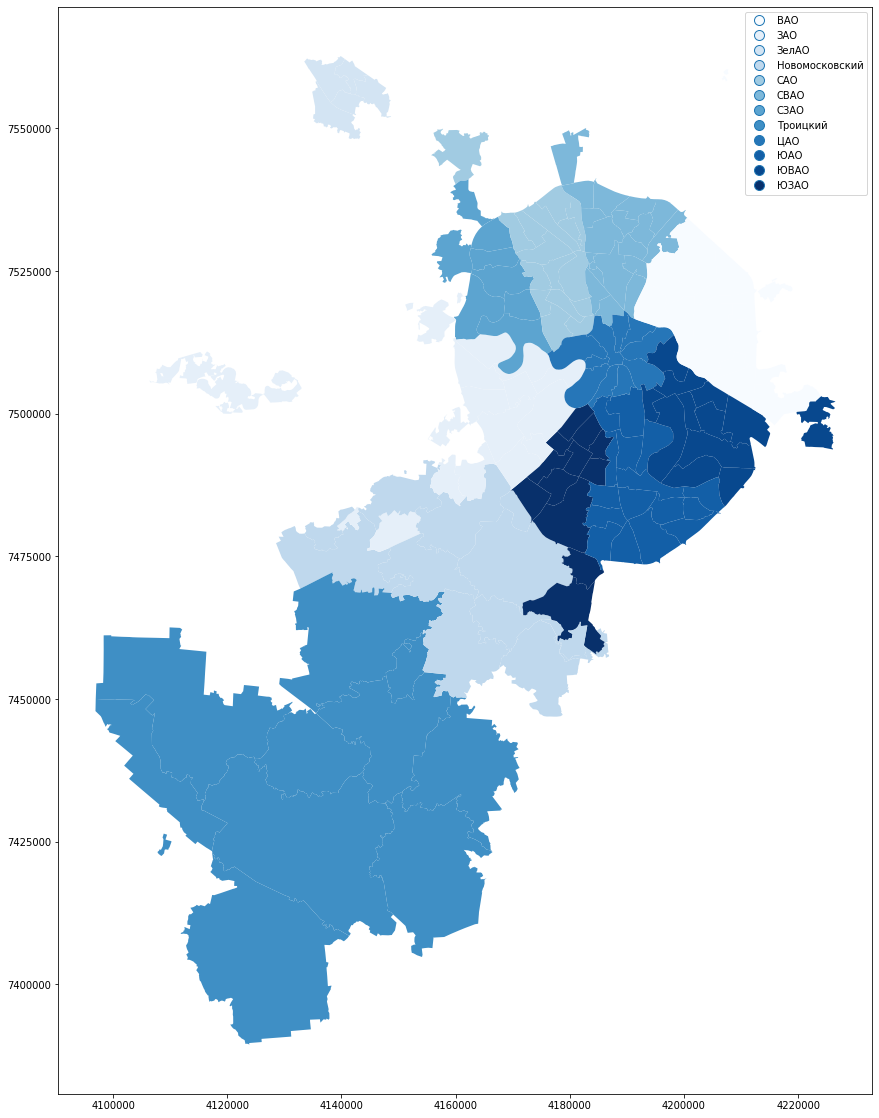

In [54]:
m_map_wm = m_map.to_crs({'init' :'epsg:3857'})
m_map_wm.plot(column = 'ABBREV_AO', linewidth=0.5, cmap='Blues', legend=True, figsize=[20,20], )

In [148]:
frames = [votes, cands]
full_votes = pd.concat(frames, axis=1)
full_votes['District'] = full_votes['District'].str.replace('ё', 'е')
m_map['NAME'] = m_map['NAME'].str.replace('ё', 'е')
full_votes

,Unnamed: 0,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК","Число бюллетеней, выданных в помещении для голосования","Число бюллетеней, выданных вне помещения для голосования",Число погашенных бюллетеней,"Число бюллетеней, содержащихся в переносных ящиках","Число бюллетеней, содержащихся в стационарных ящиках",Число недействительных бюллетеней,Число действительных бюллетеней,Число утраченных бюллетеней,"Число бюллетеней, не учтенных при получении",District,Unnamed: 0,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
0,0,7301064,5718568,2109453,149627,3459473,149535,2106162,64278,2191419,31,16,Total,0,42192,151642,256717,158106,1582762
1,1,62663,48000,18092,1034,28873,1034,18059,607,18486,1,0,район Богородское,1,383,1317,2260,1532,12994
2,2,76911,61150,23264,2239,35647,2239,23183,771,24651,0,0,район Вешняки,2,508,1877,3162,1787,17317
3,3,40553,30500,12055,1616,16829,1616,12031,472,13175,0,0,район Восточное Измайлово,3,306,1068,1804,1076,8921
4,4,100703,75200,25844,2136,47220,2136,25823,850,27109,0,0,район Гольяново,4,527,2339,3513,2258,18472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,124,64687,51429,19045,1361,31023,1361,19033,526,19868,0,0,район Чертаново Центральное,124,402,1340,2095,1361,14670
125,125,92388,69885,25933,1747,42205,1747,25892,644,26995,0,0,район Чертаново Южное,125,540,1972,2545,1729,20209
126,126,93986,69070,35016,828,33220,828,34943,915,34856,6,0,Новомосковская,126,540,1559,2367,1144,29246
127,127,100254,87545,39476,2660,45409,2660,39472,992,41140,0,0,Троицкий административный округ,127,588,2040,3003,1292,34217


In [149]:
full_votes['District'] = full_votes['District'].str.replace('район ', '')
full_votes['District'] = full_votes['District'].str.replace(' район', '')
full_votes = full_votes.drop(['Unnamed: 0', 'Число бюллетеней, не учтенных при получении', 'Число утраченных бюллетеней', 'Число недействительных бюллетеней', 'Число бюллетеней, выданных в помещении для голосования', 'Число бюллетеней, выданных вне помещения для голосования', 'Число бюллетеней, содержащихся в переносных ящиках', 'Число бюллетеней, содержащихся в стационарных ящиках', 'Число утраченных бюллетеней', 'Число бюллетеней, не учтенных при получении'], axis=1)
full_votes

,"Число избирателей, внесенных в список","Число бюллетеней, полученных УИК",Число погашенных бюллетеней,Число действительных бюллетеней,District,Балакин Михаил Дмитриевич,Дегтярев Михаил Владимирович,Кумин Вадим Валентинович,Свиридов Илья Тимурович,Собянин Сергей Семенович
0,7301064,5718568,3459473,2191419,Total,42192,151642,256717,158106,1582762
1,62663,48000,28873,18486,Богородское,383,1317,2260,1532,12994
2,76911,61150,35647,24651,Вешняки,508,1877,3162,1787,17317
3,40553,30500,16829,13175,Восточное Измайлово,306,1068,1804,1076,8921
4,100703,75200,47220,27109,Гольяново,527,2339,3513,2258,18472
...,...,...,...,...,...,...,...,...,...,...
124,64687,51429,31023,19868,Чертаново Центральное,402,1340,2095,1361,14670
125,92388,69885,42205,26995,Чертаново Южное,540,1972,2545,1729,20209
126,93986,69070,33220,34856,Новомосковская,540,1559,2367,1144,29246
127,100254,87545,45409,41140,Троицкий административный округ,588,2040,3003,1292,34217


In [150]:
set(full_votes['District'])

{'Total',
 'Академический',
 'Алексеевский',
 'Алтуфьевский',
 'Арбат',
 'Аэропорт',
 'Бабушкинский',
 'Басманный',
 'Беговой ',
 'Бескудниковский',
 'Бибирево',
 'Бирюлево Восточное',
 'Бирюлево Западное',
 'Богородское',
 'Братеево',
 'Бутырский',
 'Вешняки ',
 'Внуково',
 'Войковский',
 'Восточное Дегунино',
 'Восточное Измайлово ',
 'Восточный',
 'Выхино-Жулебино',
 'Гагаринский',
 'Головинский',
 'Гольяново ',
 'Даниловский',
 'Дмитровский',
 'Донской',
 'Дорогомилово',
 'Замоскворечье',
 'Западное Дегунино',
 'Зюзино',
 'Зябликово',
 'Ивановское ',
 'Измайлово ',
 'Капотня',
 'Коньково',
 'Коптево',
 'Косино-Ухтомский ',
 'Котловка',
 'Красносельский',
 'Крылатское',
 'Крюково',
 'Кузьминки',
 'Кунцево',
 'Куркино',
 'Левобережный',
 'Лефортово',
 'Лианозово',
 'Ломоносовский',
 'Лосиноостровский',
 'Люблино',
 'Марфино',
 'Марьина Роща',
 'Марьино',
 'Матушкино',
 'Метрогородок ',
 'Мещанский',
 'Митино',
 'Можайский',
 'Молжаниновский',
 'Москворечье-Сабурово',
 'Нагатино-Садов

In [147]:
dis1 = set(m_map['NAME'])
dis2 = set(full_votes['District'])
diff = dis2.difference(dis1)
diff.discard('Total')
dis_diff = list(diff)
dis_diff

['Нагатинскийзатон',
 'ПроспектВернадского',
 'ЗападноеДегунино',
 'ЧертановоЮжное',
 'СеверноеИзмайлово',
 'БирюлевоВосточное',
 'ЮжноеМедведково',
 'ТеплыйСтан',
 'ВосточноеИзмайлово',
 'Сосенская',
 'Филевскийпарк',
 'ЧертановоСеверное',
 'Соколинаягора',
 'ЧертановоЦентральное',
 'Троицкийадминистративныйокруг',
 'Новомосковская',
 'СтароеКрюково',
 'МарьинаРоща',
 'ЮжноеБутово',
 'Орехово-БорисовоСеверное',
 'ЮжноеТушино',
 'СеверноеМедведково',
 'Орехово-БорисовоЮжное',
 'СеверноеБутово',
 'СеверноеТушино',
 'БирюлевоЗападное',
 'ВосточноеДегунино']